In [113]:
#importing necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import networkx as nx


In [114]:
#loading the dataset
if not os.path.exists("wiki-Vote.txt"):
    urllib.request.urlretrieve("https://snap.stanford.edu/data/wiki-Vote.txt.gz", "wiki-Vote.txt.gz")
    os.system("gzip -d wiki-Vote.txt.gz")


data = pd.read_csv("wiki-Vote.txt", delimiter="\t", comment="#", header=None, names=["FromNodeId", "ToNodeId"])


In [115]:
data #showing dataset

,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478
...,...,...
103684,8272,4940
103685,8273,4940
103686,8150,8275
103687,8150,8276


In [116]:
#creating a graph from the dataset
G = nx.DiGraph()
for i in range(len(data)):
  G.add_edge(data['FromNodeId'][i],data['ToNodeId'][i])

In [117]:
#showing the graph
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
#                        node_size = 1)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edges(G, pos,  edge_color='r', arrows=True)

# plt.show()

In [118]:
#function to sort dictionaries
def sort_dict(dictionary):
  nodes = list(dictionary.keys())
  nodes.sort()
  dictionary = {i: dictionary[i] for i in nodes}
  return dictionary


In [137]:
# Page Rank using the inbuilt networkx library

pagerank = nx.pagerank(G,0.4) # G is graph, 0.4 is weight
pagerank = sort_dict(pagerank)


In [120]:
print(pagerank) # printing pagerank obtained by using library function

{3: 0.0001677116675652369, 4: 9.536880242770341e-05, 5: 9.536880242770341e-05, 6: 0.00024472924697803157, 7: 9.536880242770341e-05, 8: 0.0002642482606167609, 9: 9.536880242770341e-05, 10: 0.00023986881260663504, 11: 9.536880242770341e-05, 12: 9.536880242770341e-05, 13: 9.536880242770341e-05, 14: 9.536880242770341e-05, 15: 0.0021244260282856503, 16: 9.536880242770341e-05, 17: 9.536880242770341e-05, 18: 9.536880242770341e-05, 19: 0.00013051769882166712, 20: 9.536880242770341e-05, 21: 9.536880242770341e-05, 22: 9.536880242770341e-05, 23: 0.0001359009222661416, 24: 9.536880242770341e-05, 25: 9.536880242770341e-05, 26: 9.536880242770341e-05, 27: 9.536880242770341e-05, 28: 0.0010991630690981662, 29: 0.0001538785712431366, 30: 0.00015573853955830414, 31: 9.536880242770341e-05, 32: 0.00017759058145031805, 33: 0.00028367345710086326, 34: 0.00024674890913242665, 35: 0.0003734011508978616, 36: 0.00014338697086165088, 37: 9.536880242770341e-05, 38: 0.00013330892522577922, 39: 0.0003116997613468886

In [138]:
#function to plot graph
def plot(x_axis,y_axis, title):
  
  fig = plt.figure()
  fig.set_figwidth(5)
  fig.set_figheight(5)
  plt.plot(x_axis, y_axis)
  plt.title(title)
  plt.xlabel("Nodes")
  plt.ylabel("Score")
  plt.show()

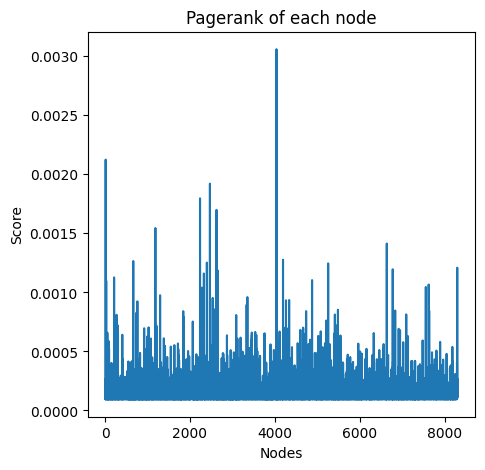

In [140]:
# plotting pagerank of each node
nodes, pagerank_score = list(pagerank.keys()),list(pagerank.values())
plot(nodes, pagerank_score,"Pagerank of each node")


In [123]:
# Hub and Authority using the inbuilt Networkx library

hub, authority = nx.hits(G)
hub = sort_dict(hub)
authority = sort_dict(authority)

In [124]:
# showing hub and authority of each node
print("Hub score: ",hub)
print("Authority score: ",authority)

Hub score:  {3: 4.021031639777635e-05, 4: 7.319607685824178e-05, 5: 3.501788474433638e-05, 6: 0.0010539872861763616, 7: 8.200618013274933e-05, 8: 0.0003200123333087149, 9: 0.00023181963355171437, 10: 0.00018207047608178442, 11: 0.004921182063808105, 12: 0.00028822862451763294, 13: 3.120053955681929e-05, 14: 0.0004975871202612585, 15: 0.00041573260338093835, 16: 8.409812451935353e-05, 17: 0.00010084393686112595, 18: 3.617008656019798e-05, 19: 7.2174737201482e-05, 20: 0.0008868292175658337, 21: 0.00029286346222089045, 22: 6.2173392000659725e-06, 23: 0.00018134382079422918, 24: 0.002645359109055594, 25: 0.00021311562589770757, 26: 0.0001458915638968584, 27: 0.0005196190515395968, 28: 0.0003569336095194365, 29: 0.0006751699797052772, 30: 7.925509536668047e-05, 31: 3.7014857557552105e-05, 32: 1.3200870183843301e-05, 33: 6.990816089010817e-05, 34: 8.00722619592627e-06, 35: 0.00021942583528112753, 36: 0.001903126307817955, 37: 0.0001975968782896224, 38: 4.9473774019337135e-05, 39: 0.000106622

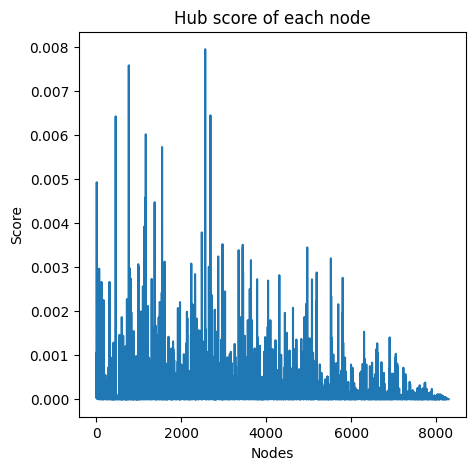

In [142]:
# plotting hub score of each node
nodes,hub_score = list(hub.keys()),list(hub.values())
plot(nodes, hub_score, "Hub score of each node")


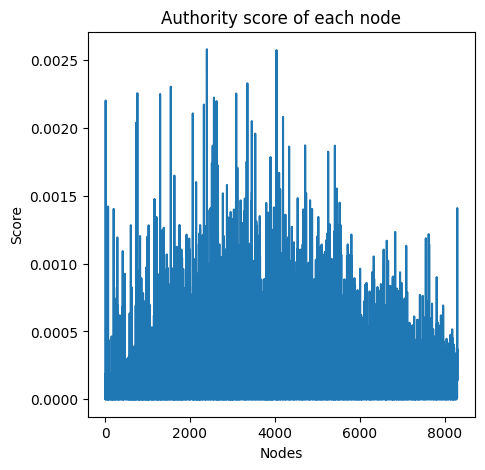

In [143]:
# plotting authority score of each node
nodes, auth_score = list(authority.keys()),list(authority.values())
plot(nodes, auth_score,"Authority score of each node")


In [127]:
# Showing node wise comparison for each node
df = pd.DataFrame()
df['Nodes'] = nodes
df['Pagerank'] = pagerank_score
df['Hub Score'] = hub_score
df['Authority Score'] = auth_score

In [128]:
df

,Nodes,Pagerank,Hub Score,Authority Score
0,3,0.000168,0.000040,9.501172e-05
1,4,0.000095,0.000073,3.937246e-20
2,5,0.000095,0.000035,2.581388e-20
3,6,0.000245,0.001054,6.398066e-05
4,7,0.000095,0.000082,-1.280203e-19
...,...,...,...,...
7110,8293,0.001209,-0.000000,1.408707e-03
7111,8294,0.000422,-0.000000,1.121717e-03
7112,8295,0.000428,-0.000000,1.093686e-03
7113,8296,0.000109,-0.000000,1.374990e-04


In [133]:
# Function to plot graphs for showing comparison
def comparison_plot(nodes, pagerank_score, hub_score, auth_score, is_hub, is_auth):

  if is_hub == True:
    plt.plot(nodes, hub_score, label = "Hub Score")
  if is_auth == True:
    plt.plot(nodes, auth_score, label = "Authority Score")
  plt.plot(nodes, pagerank_score, label = "Pagerank")
  plt.xlabel("Nodes")
  plt.ylabel("Score")
  plt.legend()
  plt.show()

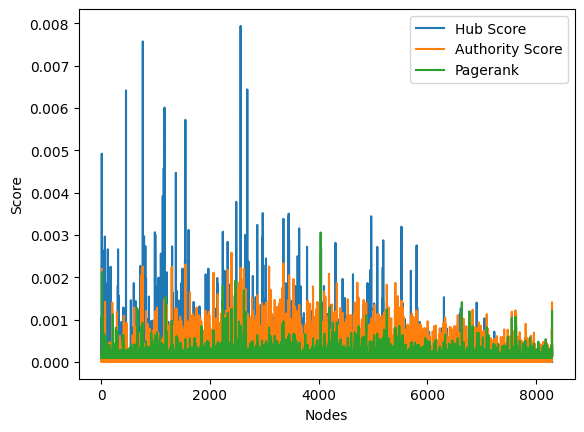

In [134]:
# function call for plotting comparison between pagerank, hub score, authority score
comparison_plot(nodes, pagerank_score, hub_score, auth_score, True, True) 

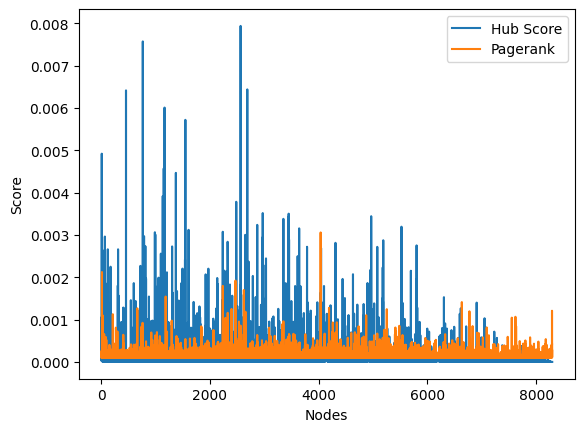

In [135]:
# function call for plotting comparison between pagerank, hub score
comparison_plot(nodes, pagerank_score, hub_score, auth_score, True, False)

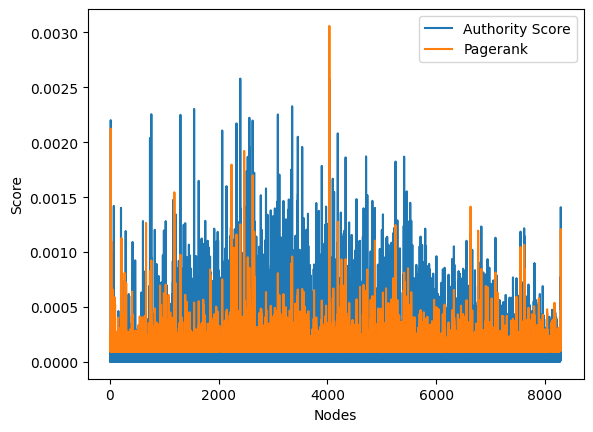

In [136]:
# function call for plotting comparison between pagerank, authority score
comparison_plot(nodes, pagerank_score, hub_score, auth_score, False, True)

In [ ]:
# There is a difference in all these score because:
# 1. Pagerank ranks pages based on the structure of the incoming links where as hub  is calculated
# based on the outgoing links and authority based on the incoming links.

# 2. Pagerank uses probability to visit random pages to rank the pages whereas HITS uses hub and authority
# score. Hub contains information about how many links are there that contain relevant information and 
# authotity contribute to the pages that actually contain content.